<a href="https://colab.research.google.com/github/thaistrinxet/MVP1_Analise_Estoque/blob/main/MVP1_Analise_de_Estoque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Análise de Dados e Boas Práticas
Profs. Tatiana Escovedo e Hugo Villamizar

##Aluna: Thaís Alvarenga Trinxet

MPV referente a primeira sprint do curso de Pós-Graduação em Ciências de Dados e Analytics da PUC-RJ, onde exploro meus conhecimentos adquiridos nas máterias de Análise Exploratória e Pré-Processamento de Dados.

##1. Definição do Problema

À medida que novembro se aproxima, é crucial que os lojistas, tenham uma visão detalhada e alinhada do estoque em relação às suas disponibilidades de produtos para a Black Friday. Dentre as análises essenciais para este período, destacam-se: avaliação do valor de venda do estoque, quantidade de produtos disponíveis, categorização por tipo e subtipo de produto, diponibilidade do produto para o cliente, além de outros fatores relevantes não contemplados neste estudo.

O dataset fornecido será fundamental para orientar nossa análise exploratória e pré-processamento, para uma empresa de moda omnichannel oferecendo insights valiosos que permitirá que o canal digital explore seus estoques de maneira eficiente, alinhando-se com a disponibilidade de produtos ao longo de todo o mês, possibilitando uma abordagem estratégica e proativa.


O dataset **Análise de Estoque**, pertence ao problema de uma empresa real, porém algumas informações foram manipulados e trocadas para manter a confidencialidade dos dados.

O conjunto consiste nos dados de 02 Centros de Distribuições e 08 lojas físicas que alimentam o estoque do canal digital da empresa. Há 09 colunas. Não há valores ausentes. O estudo tem como objetivo avaliar as melhores estratégias disponíveis para venda por categoria.

Este é um problema de aprendizado não supervisionado.

É um arquivo no formato csv.


Para esse trabalho foram levantadas algumas hipóteses:

1. Quais as principais categorias que devem ser explorada durante o mês, devido a ter um maior estoque e uma rentabilidade financeira melhor?

2. Todos os produtos disponíveís no estoque, estão disponibilizado para venda no site com foto?

3. Existe alguma estratégia para ajudar a empresa com inshigts tirados da análise?

Para facilitar o entendimento no decorrer das análises, segue os nomes dos atributos do dataset.


**Informações sobre os atributos:**
1. **filial** - lojas e centros de distribuição que disponibilizam estoque para o canal digital

2. **referencia** - identificação do produto (sku)

3. **categoria** - categoria do produto

4. **subcategoria** - sub categoria do produto

5. **valor_venda** - valor de venda do produto em estoque

6. **qtde_estoque** - quantidade de peças em estoque do produto

7. **status_foto** - produto com ou sem foto disponível

8. **status_referencia** - identifica qual status atual da referência_cor do produto no canal digital: ativo no site, foto em tratamento, desativado ou sem foto.

9. **motivo_desativado** - identifica o motivo do produto ter sido retirado do site: falta de padrão no tamanho, problema de qualidade no produto, produto diferente da imagem.










In [89]:
#Importações
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [90]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

A importação do dataset será através do pacote Pandas (Python Data Analysis Library), um arquivo .csv disponibilizado no github.

Com o dataset carregado, iremos explorá-lo um pouco.

In [5]:
# Informar a URL de importação do dataset
url = "https://raw.githubusercontent.com/thaistrinxet/mvp_estoque/main/analise_estoque_1.csv"

#Cabeçalho das colunas
colunas = ['filial', 'referencia','categoria', 'subcategoria', 'valor_venda', 'qtde_estoque', 'status_foto', 'status_referencia', 'motivo_devolucao']

# Lê o arquivo utilizando as colunas informadas
analise_estoque_1 = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')


In [6]:
#verificando o tipo de dataset, se é dataframe
type (analise_estoque_1)

pandas.core.frame.DataFrame

In [7]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
analise_estoque_1.head ()

,filial,referencia,categoria,subcategoria,valor_venda,qtde_estoque,status_foto,status_referencia,motivo_devolucao
0,loja 01,29.16923_0024,colete / kimono,kimono,895,5,com foto,desativado,falta de padrao no tamanho
1,loja 01,29.16854_04312,bermuda /short,short,516,4,com foto,ativo no site,0
2,loja 01,29.15618_0005,blusa,blusa,636,4,com foto,ativo no site,0
3,loja 01,29.15033_04065,vestido,vestido,1116,4,com foto,ativo no site,0
4,loja 01,29.06715_2440,calca,calca,956,4,com foto,desativado,falta de padrao no tamanho


## 3. Análise de Dados

### 3.1 Estatíticas Descritivas

Vamos iniciar explorando um pouco o dataset, suas dimensões, informações e alguns exemplos de linhas.
O dataset é composto por 6207 linhas referentes a cada referencia de produto distribuida por loja e 9 colunas.
Vamos ver os tipos de dados dos atributos contidos no arquivo original e uma pequena amostra das 10 primeiras e 10 ultimas linhas do dataset para analisar um pouco de seu conteúdo e verificar se a importação dos dados foi realizada de maneira correta.

In [8]:
# Mostrando as dimensões do dataset
print(analise_estoque_1.shape)

(6207, 9)


In [9]:
# Mostrando as informações do dataset
print (analise_estoque_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filial             6207 non-null   object
 1   referencia         6207 non-null   object
 2   categoria          6207 non-null   object
 3   subcategoria       6207 non-null   object
 4   valor_venda        6207 non-null   int64 
 5   qtde_estoque       6207 non-null   int64 
 6   status_foto        6207 non-null   object
 7   status_referencia  6207 non-null   object
 8   motivo_devolucao   6207 non-null   object
dtypes: int64(2), object(7)
memory usage: 436.6+ KB
None


In [10]:
# Mostrar as 10 primeiras linhas do dataset
analise_estoque_1.head(10)

,filial,referencia,categoria,subcategoria,valor_venda,qtde_estoque,status_foto,status_referencia,motivo_devolucao
0,loja 01,29.16923_0024,colete / kimono,kimono,895,5,com foto,desativado,falta de padrao no tamanho
1,loja 01,29.16854_04312,bermuda /short,short,516,4,com foto,ativo no site,0
2,loja 01,29.15618_0005,blusa,blusa,636,4,com foto,ativo no site,0
3,loja 01,29.15033_04065,vestido,vestido,1116,4,com foto,ativo no site,0
4,loja 01,29.06715_2440,calca,calca,956,4,com foto,desativado,falta de padrao no tamanho
5,loja 01,29.14393_27248,macacao,macacao,756,4,com foto,ativo no site,0
6,loja 01,29.16045_30002,vestido,vestido,796,4,com foto,ativo no site,0
7,loja 01,29.15318_04035,casaco / jaqueta,casaco,837,3,com foto,ativo no site,0
8,loja 01,29.15688_04065,blusa,top,207,3,com foto,ativo no site,0
9,loja 01,29.14142_741,blusa,blusa,327,3,com foto,ativo no site,0


In [11]:
# Mostrar as 10 últimas linhas do dataset
analise_estoque_1.tail(10)

,filial,referencia,categoria,subcategoria,valor_venda,qtde_estoque,status_foto,status_referencia,motivo_devolucao
6197,loja 03,29.13361_27253,vestido,vestido,199,1,com foto,ativo no site,0
6198,loja 03,29.06715_2440,calca,calca,239,1,com foto,desativado,falta de padrao no tamanho
6199,loja 03,29.09107_038,sapato,rasteira,179,1,com foto,ativo no site,0
6200,loja 03,29.14051_1573,calca,calca,159,1,com foto,ativo no site,0
6201,loja 03,29.01133_2438,blusa,blusa,39,1,sem foto,sem foto,0
6202,loja 03,29.14052_04013,calca,calca,149,1,com foto,ativo no site,0
6203,loja 03,29.13509_27271,vestido,vestido,299,1,com foto,ativo no site,0
6204,loja 03,29.10770_055,bermuda /short,short,89,1,com foto,ativo no site,0
6205,loja 03,29.14065_04013,bermuda /short,short,149,1,com foto,ativo no site,0
6206,loja 03,29.13727_0005,blusa,blusa,79,1,com foto,ativo no site,0


Avaliar os tipos de dados é um procedimento essencial para assegurar a habilidade de trabalhar com o conjunto de maneira precisa e eficiente. Os tipos de dados têm um impacto direto na forma como você manipula e analisa o conjunto de dados.

Após verificar os tipos de dados, observamos que muitos atributos estão designados como objetos (object) e dois classificados como números inteiros (int64).

In [53]:
# Fazendo um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
analise_estoque_1.describe()

,valor_venda,qtde_estoque
count,6207.000000,6207.000000
mean,1044.997744,8.247301
std,2412.769072,18.282329
min,29.000000,1.000000
25%,178.000000,1.000000
50%,358.000000,3.000000
75%,945.000000,7.000000
max,60098.000000,354.000000


Conseguimos observar com o resumo estátistico dos valores númerico do dataset que a contagem (count) tem a presença de 6207 registros para ambos os campos. Isso indica que não há valores faltantes nessas colunas.

A média de valor_venda é aproximadamente 1045 unidades, enquanto a média de qtde_estoque é de cerca de 8 unidades. Isso fornece uma ideia da tendência central dos dados.

Desvio Padrão (std): O desvio padrão de valor_venda é significativamente alto (aproximadamente 2413), sugerindo uma dispersão considerável em torno da média. Já o desvio padrão de qtde_estoque é menor (cerca de 18), indicando uma variação relativamente menor em relação à média.

Mínimo e Máximo (min e max): O menor valor observado em valor_venda é 29, enquanto o maior é 60098. Em relação a qtde_estoque, o mínimo é 1 e o máximo é 354. Analisando o dataset consigo obsevar que o max em valor_estoque (60098) e o qtde_estoque (354) é referente a uma referencia da categoria vestido alocada no estoque do CD-SP.

Quartis (25%, 50%, 75%): Os quartis ajudam a entender a distribuição dos dados. Por exemplo, 25% dos valores de valor_venda estão abaixo de 178, enquanto 75% estão abaixo de 945. Para qtde_estoque, 75% dos valores estão abaixo de 7.

Essa análise fornece insights sobre a distribuição, variabilidade e tendências centrais desses atributos, permitindo uma compreensão básica do comportamento desses dados no conjunto de dados analisado.

In [13]:
# distribuição das classes
print(analise_estoque_1.groupby('categoria').size())

categoria
acessório            282
bermuda /short       388
blusa               2669
bolsa                 26
calca                864
casaco / jaqueta     289
colete / kimono       67
macacao              235
saia                 269
sapato                95
vestido             1023
dtype: int64


### 3.2 Visualizações Unimodais

As visualizações unimodais, nos permite indentificar a localização do pico, a simetria da distribuição, entre outros aspectos que pode ser útil para tomada de decisão.

Como estamos analizando produtos por categoria, trouxe uma visualização em histograma e density plot pela soma de quantidade de peças em estoque.

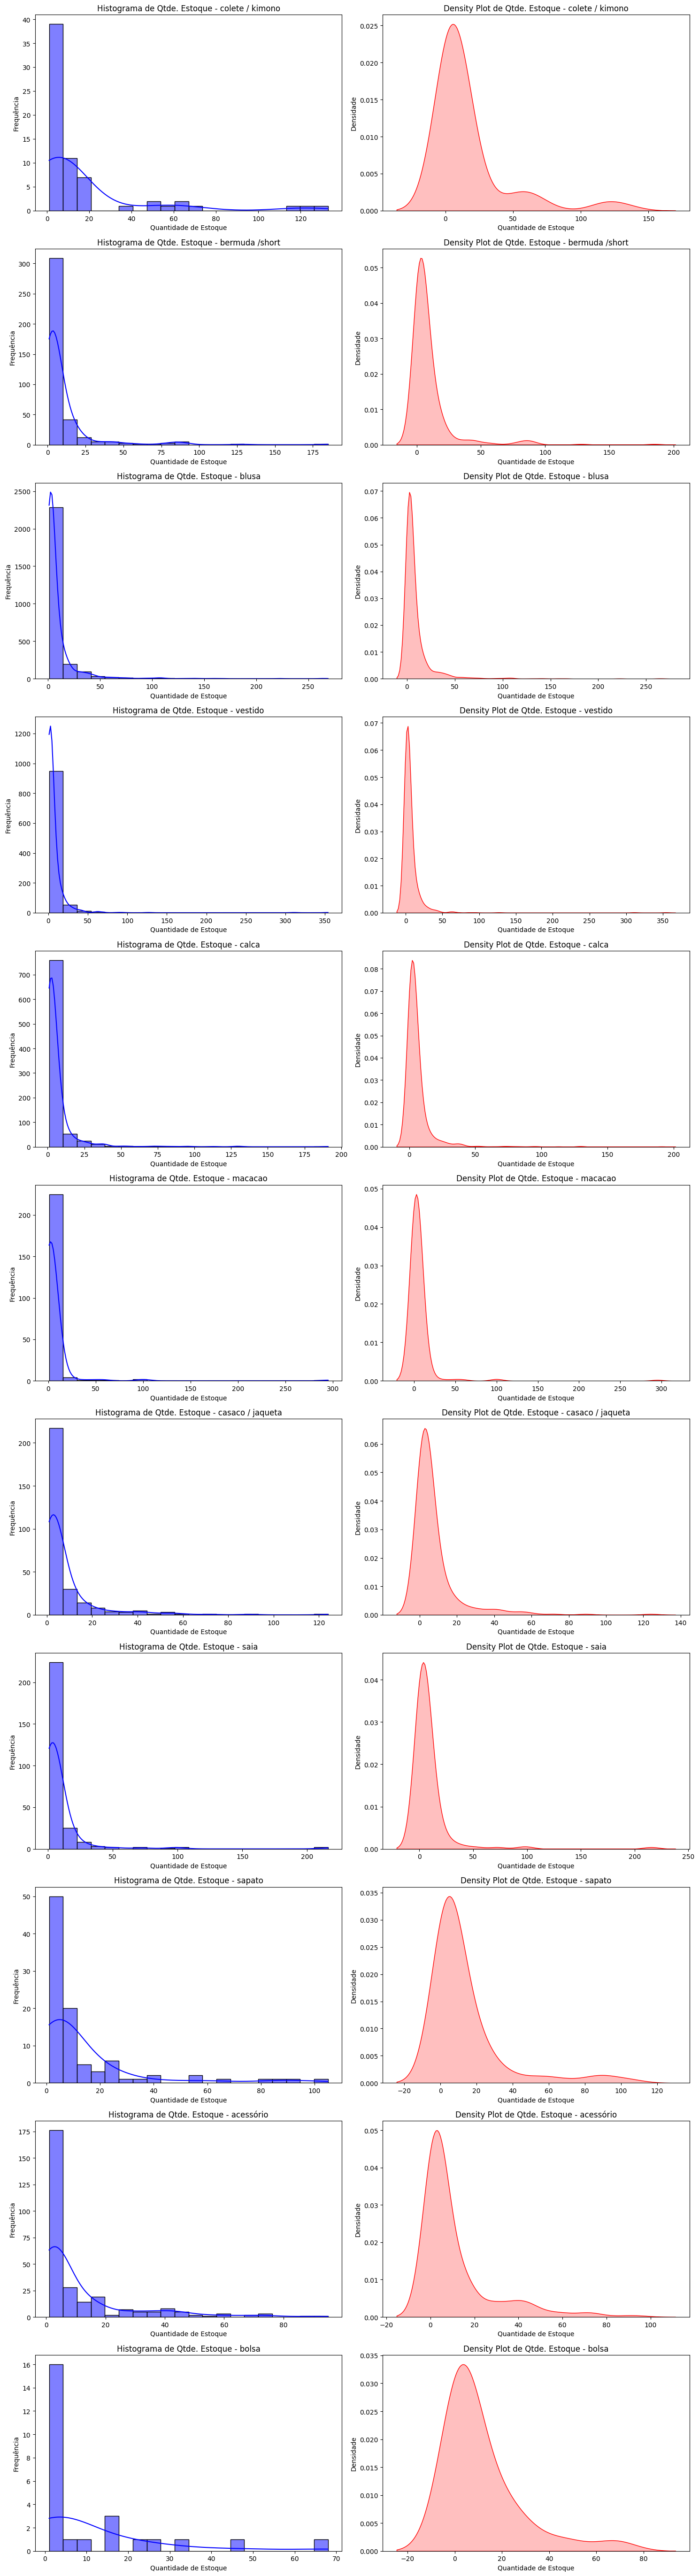

In [64]:
# Obtendo as categorias únicas
categorias_unicas = analise_estoque_1['categoria'].unique()

# Configuração do layout dos subplots
num_colunas = 2  # Número de colunas para exibir os gráficos
num_linhas = len(categorias_unicas)  # Uma linha para cada categoria

# Criando subplots para cada categoria com histogramas e density plots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 5 * num_linhas))

# Iteração para plotar os gráficos
for i, categoria in enumerate(categorias_unicas):
    # Filtrando o DataFrame pela categoria atual
    df_categoria = analise_estoque_1[analise_estoque_1['categoria'] == categoria]['qtde_estoque']

    # Plotando o histograma para qtde_estoque
    sns.histplot(df_categoria, ax=axs[i, 0], bins=20, color='blue', kde=True)
    axs[i, 0].set_xlabel('Quantidade de Estoque')
    axs[i, 0].set_ylabel('Frequência')
    axs[i, 0].set_title(f'Histograma de Qtde. Estoque - {categoria}')

    # Plotando o density plot para qtde_estoque
    sns.kdeplot(data=df_categoria, ax=axs[i, 1], color='red', fill=True)
    axs[i, 1].set_xlabel('Quantidade de Estoque')
    axs[i, 1].set_ylabel('Densidade')
    axs[i, 1].set_title(f'Density Plot de Qtde. Estoque - {categoria}')

# Ajustando layout e mostrando os gráficos
plt.tight_layout()
plt.show()

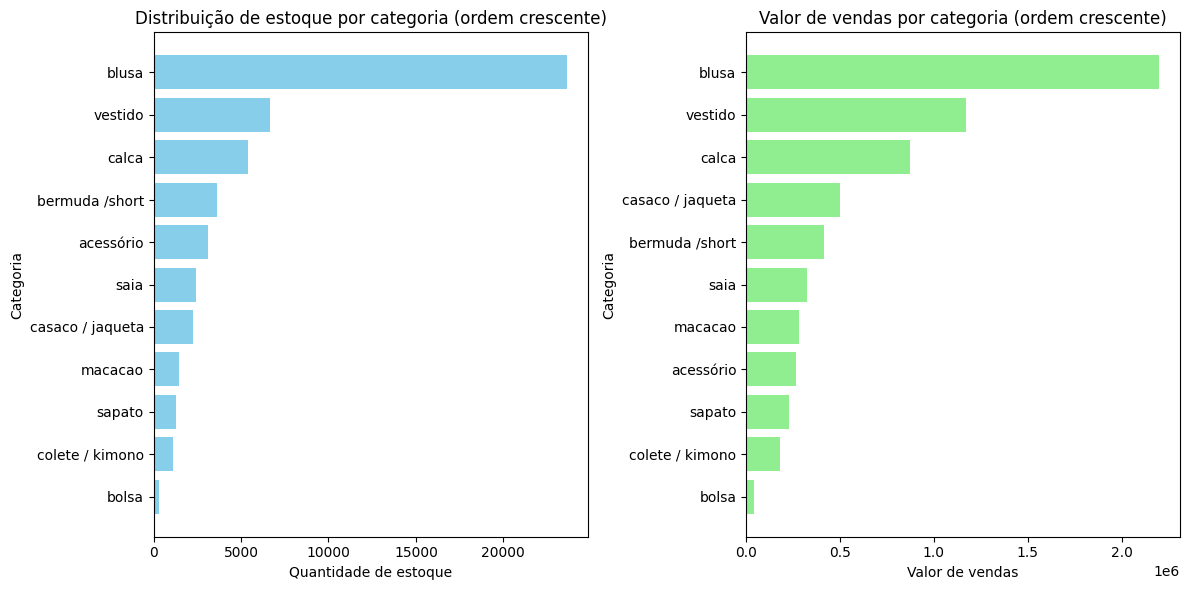

In [101]:
# Agrupando por categoria e calculando a soma da quantidade de estoque e o valor total de vendas
grupo_categoria = analise_estoque_1.groupby('categoria').agg({'qtde_estoque': 'sum', 'valor_venda': 'sum'})

# Ordenando os dados pela quantidade de estoque
grupo_categoria_estoque = grupo_categoria.sort_values(by='qtde_estoque')

# Ordenando os dados pelo valor de vendas
grupo_categoria_vendas = grupo_categoria.sort_values(by='valor_venda')

# Obtendo as categorias e os valores de estoque e vendas ordenados
categorias_estoque = grupo_categoria_estoque.index.tolist()
quantidades_estoque = grupo_categoria_estoque['qtde_estoque'].tolist()

categorias_vendas = grupo_categoria_vendas.index.tolist()
valores_vendas = grupo_categoria_vendas['valor_venda'].tolist()

# Criando o layout de subplot com 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras horizontal para quantidade de estoque (subplot 1)
axs[0].barh(categorias_estoque, quantidades_estoque, color='skyblue')
axs[0].set_title("Distribuição de estoque por categoria (ordem crescente)")
axs[0].set_xlabel("Quantidade de estoque")
axs[0].set_ylabel("Categoria")

# Gráfico de barras horizontal para valor de vendas (subplot 2)
axs[1].barh(categorias_vendas, valores_vendas, color='lightgreen')
axs[1].set_title("Valor de vendas por categoria (ordem crescente)")
axs[1].set_xlabel("Valor de vendas")
axs[1].set_ylabel("Categoria")

plt.tight_layout()
plt.show()

### 3.3 Visualizações Categóricas

Nessa etapa da análise vamos conseguir identificar a distribuição categóricas atraves do gráfico de pizza.

Ao criar os gráficos percebi que seria interessante para a análise apresentar em forma % (percentual) os resultados, onde vamos conseguir indentificar de forma mais rápida a nossa primeira hipótese da resolução do nosso problema.

Apresento dois gráficos:

1 - soma de quantidade de produtos em estoque por categoria (qtde_estoque)

2 - soma de valor de venda em estoque por categoria (valor_venda)

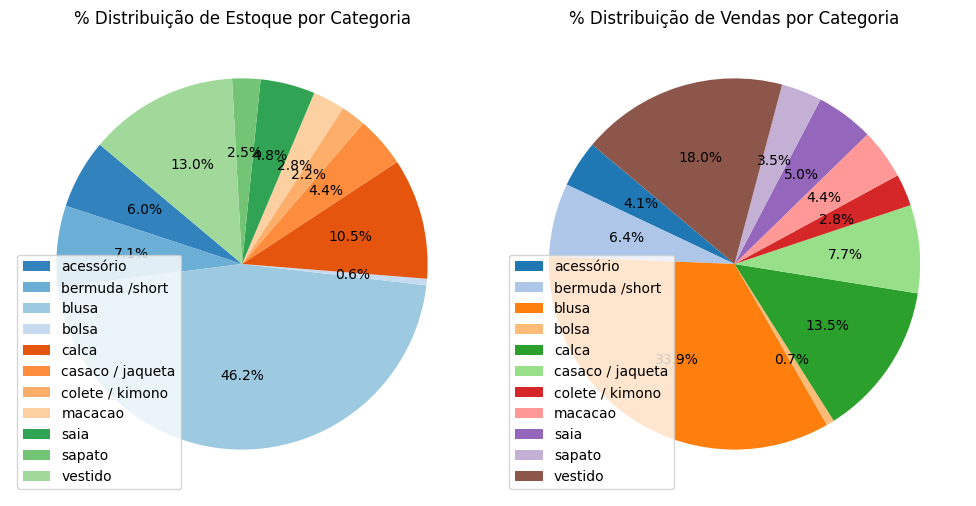

In [68]:

# Agrupando por categoria e calculando a soma da quantidade de estoque e o valor total de vendas
grupo_categoria = analise_estoque_1.groupby('categoria').agg({'qtde_estoque': 'sum', 'valor_venda': 'sum'})

# Calculando as porcentagens para a quantidade de estoque e valor de vendas
total_estoque = grupo_categoria['qtde_estoque'].sum()
total_vendas = grupo_categoria['valor_venda'].sum()

porcentagens_estoque = (grupo_categoria['qtde_estoque'] / total_estoque) * 100
porcentagens_vendas = (grupo_categoria['valor_venda'] / total_vendas) * 100

# Criando uma paleta de cores customizada para cada categoria
cores_estoque = plt.cm.tab20c.colors[:len(porcentagens_estoque)]
cores_vendas = plt.cm.tab20.colors[:len(porcentagens_vendas)]

# Criando o layout de subplot com 1 linha e 2 colunas, ajustando o tamanho da figura
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de pizza para a porcentagem de quantidade de estoque (subplot 1)
axs[0].pie(porcentagens_estoque, labels=None, autopct='%1.1f%%', startangle=140, colors=cores_estoque)
axs[0].set_title('% Distribuição de Estoque por Categoria', fontsize=12)
axs[0].legend(porcentagens_estoque.index, loc='best', fontsize=10)  # Adiciona uma legenda com as categorias

# Gráfico de pizza para a porcentagem de valor de vendas (subplot 2)
axs[1].pie(porcentagens_vendas, labels=None, autopct='%1.1f%%', startangle=140, colors=cores_vendas)
axs[1].set_title('% Distribuição de Vendas por Categoria', fontsize=12)
axs[1].legend(porcentagens_vendas.index, loc='best', fontsize=10)  # Adiciona uma legenda com as categorias

plt.tight_layout()
plt.show()

A visualização do primeiro gráfico, nos mostra que temos 46.2% de quantidade de peças em estoque em blusas, em segundo temos vestido com 13% e em terceiro calça com 10.5%. As demais categorias estão com estoque inferior a 10%.

Olhando para o segundo gráfico, mantemos a mesma ordem em %, porém agora estamos falando em valor de estoque (financeiro).

Isso nos faz entender as principais categorias que devemos criar estratégia em vendas para abordamos durante o mês de novembro.

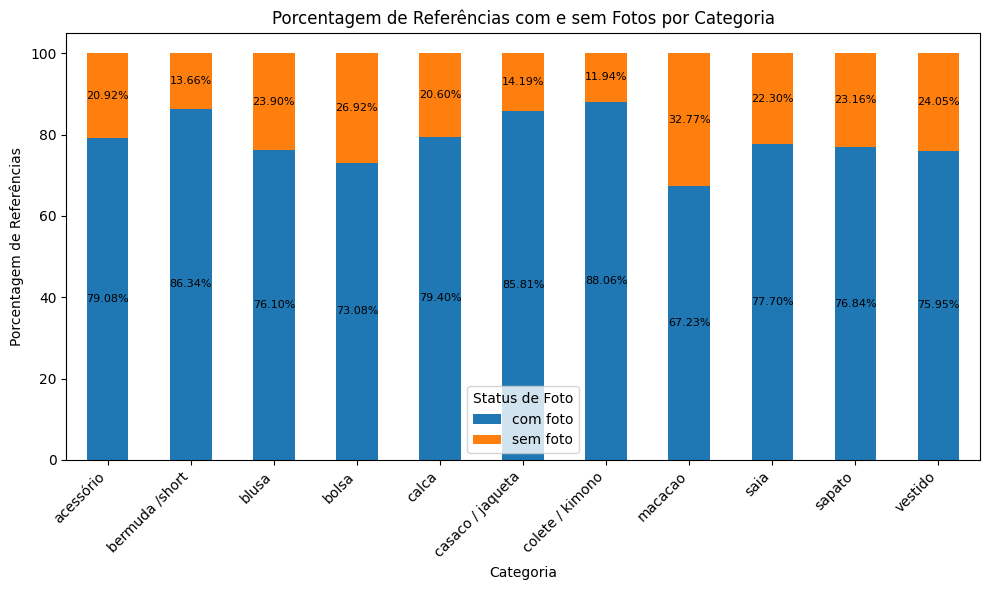

In [95]:
# Agrupando por categoria e contando as referências com e sem fotos
dados_agrupados = analise_estoque_1.groupby(['categoria', 'status_foto']).size().unstack().fillna(0)

# Calculando a porcentagem de cada seção empilhada
total_por_categoria = dados_agrupados.sum(axis=1)
dados_agrupados_porcentagem = dados_agrupados.div(total_por_categoria, axis=0) * 100

# Criando o gráfico de barras empilhadas
ax = dados_agrupados_porcentagem.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionando os valores em porcentagem nas barras
for rect in ax.patches:
    # Obtendo altura e largura das barras
    height = rect.get_height()
    width = rect.get_width()

    # Calculando a posição para o rótulo
    x = rect.get_x() + width / 2
    y = rect.get_y() + height / 2

    # Formatando e adicionando o valor em porcentagem como rótulo
    label_text = f'{height:.2f}%'
    ax.text(x, y, label_text, ha='center', va='center', fontsize=8)

# Definindo o título e os rótulos dos eixos
plt.title('Porcentagem de Referências com e sem Fotos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem de Referências')

# Ajustando o ângulo dos rótulos no eixo x
plt.xticks(rotation=45, ha='right')

# Exibindo a legenda
plt.legend(title='Status de Foto')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

Com a análise do gráfico acima, conseguimos observar que todas as categorias possuem produtos que não estão ativos no site, devido a não terem fotos. A categoria macacão é a que mais possue referências sem fotograr e a categoria colete/kimono a que mais tem suas referências fotografadas e disponibilizada para venda.

## Pré Processamento de Dados

### 4.1 Tratamento de Missings e Limpeza


In [77]:
# verificando nulls no dataset
analise_estoque_1.isnull().sum()

filial               0
referencia           0
categoria            0
subcategoria         0
valor_venda          0
qtde_estoque         0
status_foto          0
status_referencia    0
motivo_devolucao     0
dtype: int64

<Axes: >

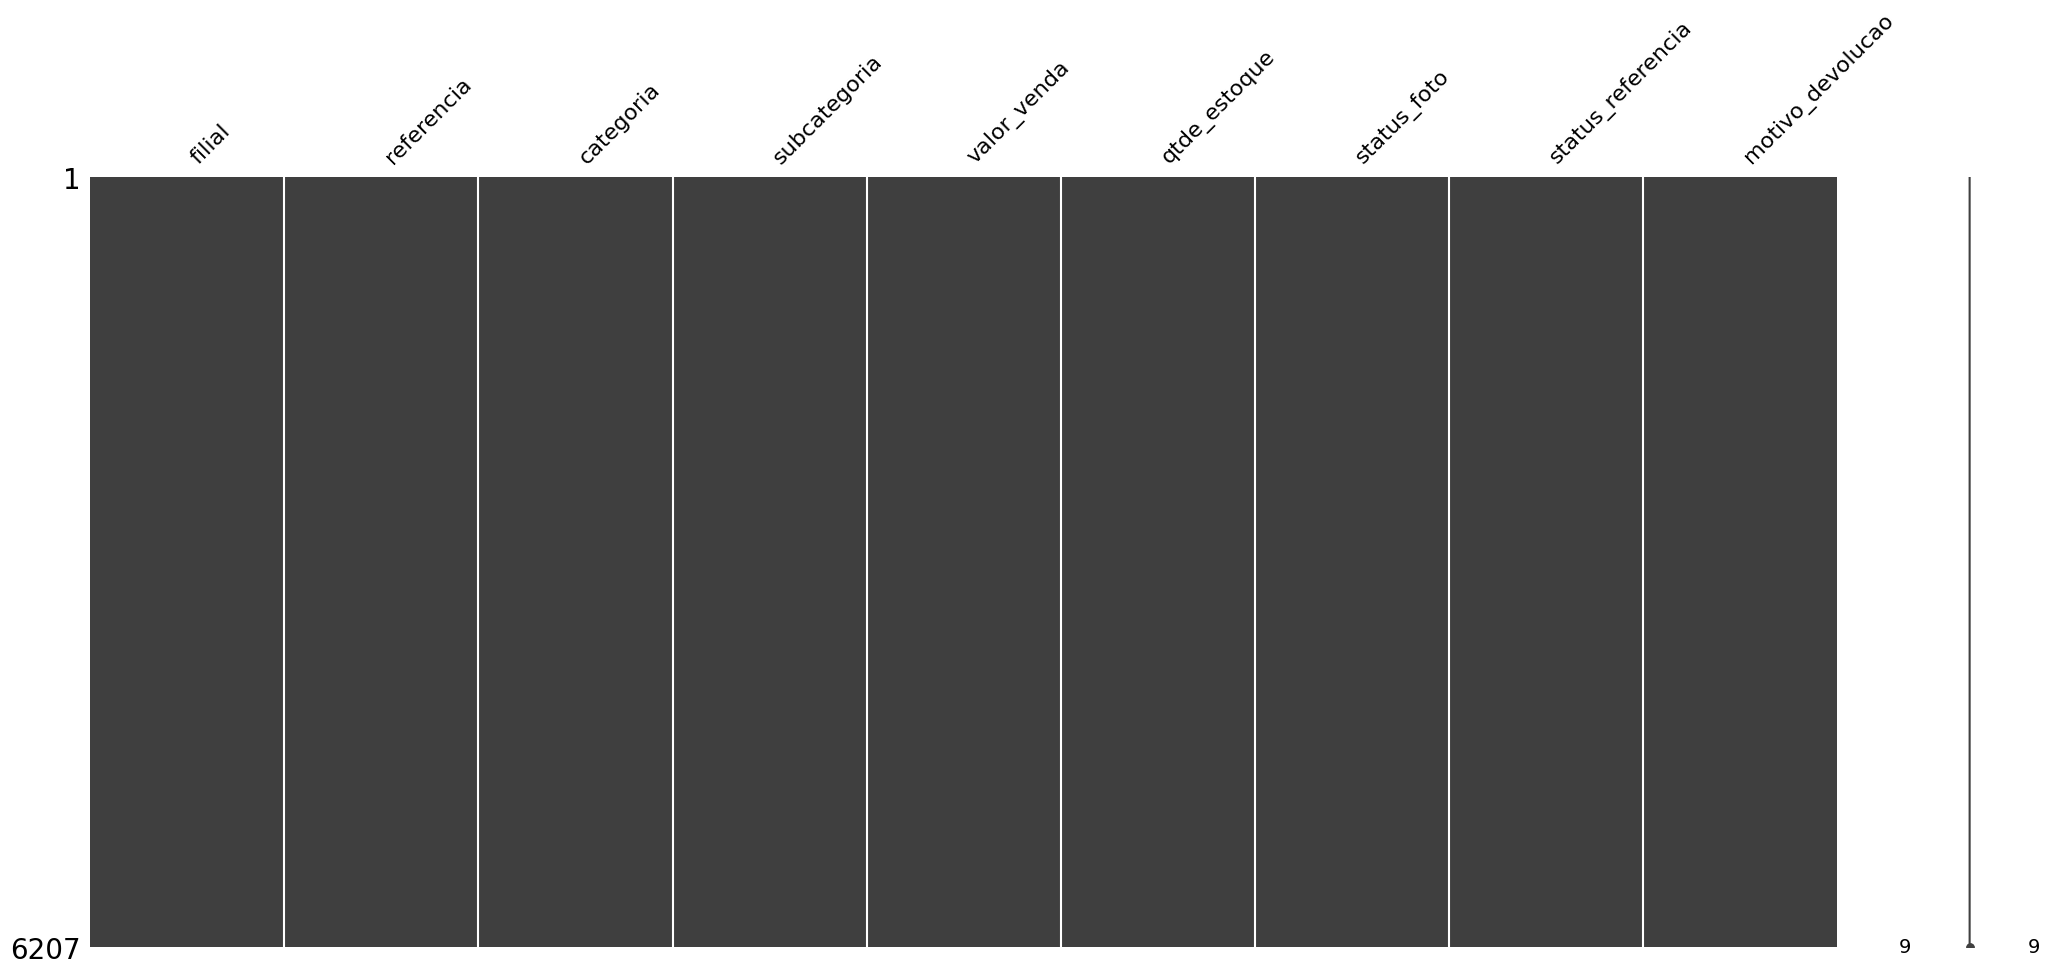

In [80]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(analise_estoque_1.columns)

# o novo dataset irá conter todas as colunas
atributos = analise_estoque_1

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

### 4.2.  Separação em conjunto de treino e conjunto de teste



In [103]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = analise_estoque_1.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

### Novas análises

Com base na hipótese número 3, que questiona se há estratégias que possam auxiliar a empresa com insights provenientes da análise, realizamos uma investigação mais aprofundada.

Ao constatar que a categoria com maior volume de produtos em estoque é 'Blusa', representando quase 50% do total de peças, optamos por desdobrar essa categoria em subcategorias. Essa segmentação nos proporcionará uma visão mais detalhada e minuciosa desses produtos específicos. Essa análise mais granular pode nos fornecer insights valiosos para desenvolver estratégias que otimizem a gestão de estoque e impulsionem as vendas, contribuindo diretamente para os objetivos da empresa

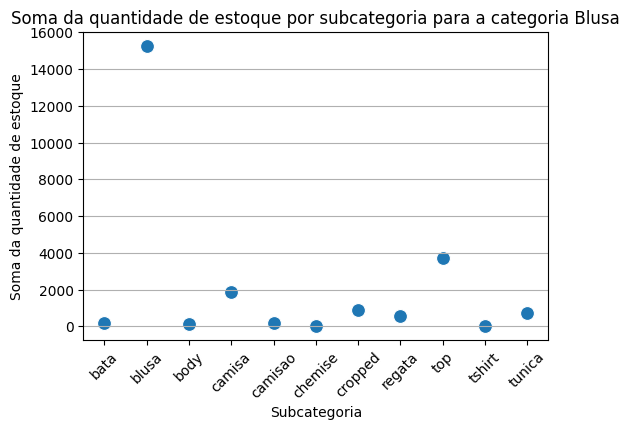

In [93]:
# Fazer uma análise por subcategoria

# Filtrar apenas a categoria 'blusa'
blusa_df = analise_estoque_1[analise_estoque_1['categoria'] == 'blusa']

# Calcular a soma da quantidade de estoque para a categoria 'blusa' por subcategoria
soma_por_subcategoria = blusa_df.groupby('subcategoria')['qtde_estoque'].sum()

# Converter a Série 'soma_por_subcategoria'
df_soma_por_subcategoria = pd.DataFrame(soma_por_subcategoria).reset_index()
df_soma_por_subcategoria.columns = ['Subcategoria', 'Soma_Qtde_Estoque']  # Renomear colunas

# Criar o Scatter Plot com Seaborn
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_soma_por_subcategoria, x='Subcategoria', y='Soma_Qtde_Estoque', s=100)
plt.title('Soma da quantidade de estoque por subcategoria para a categoria Blusa')
plt.xlabel('Subcategoria')
plt.ylabel('Soma da quantidade de estoque')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Conclusão

Após a análise dos dados, identificamos um desafio significativo para a empresa no mês de novembro, onde quase metade do estoque (46%) está concentrado na categoria 'blusa'. Para uma abordagem mais estratégica na venda desses produtos, exploramos as subcategorias relacionadas às blusas.

Considerando a chegada de um período mais quente próximo ao verão, sugerimos uma estratégia focada nas variações de blusas, como tops, cropped e camisas, visando explorar diferentes perspectivas de um mesmo produto. Essa abordagem diversificada pode ser atrativa para os clientes e impulsionar as vendas nessa categoria.

Além disso, a análise revelou que todas as categorias têm mais de 10% do estoque sem fotos. É essencial desenvolver e aprimorar estratégias para incluir esses produtos no site, já que a presença de fotos é crucial para impulsionar as vendas online.